## Bayesian Linear Regression
Requires PyMC library. Everything else is standard statistics and machine learning libraries.

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline 
import numpy as np
import pandas as pd
import pymc3 as pm
import seaborn as sns
from sklearn.model_selection import train_test_split
import scipy

In [29]:
data = pd.read_csv("first_lr.csv")
data.drop(columns=['Unnamed: 0', 'index'], inplace=True)
data.head()

,PlayerHeight,PlayerWeight,Yards,Down,YardLine,Distance,Week,Temperature,Humidity,HomeScoreBeforePlay,VisitorScoreBeforePlay,Position
0,70,205,8,3,35,2,1,63.0,77.0,0,0,RB
1,70,205,3,1,43,10,1,63.0,77.0,0,0,RB
2,70,205,5,1,35,10,1,63.0,77.0,0,0,RB
3,71,210,2,2,2,2,1,63.0,77.0,0,0,RB
4,71,216,7,1,25,10,1,63.0,77.0,7,0,RB


In [43]:
with pm.Model() as model:
    # Data
    x1 = pm.Data('PlayerWeight', data['PlayerWeight'].values)
    x2 = pm.Data('Down', data['Down'].values)
    x3 = pm.Data('YardLine', data['YardLine'].values)
    x4 = pm.Data('Distance', data['Distance'].values)
    x5 = pm.Data('Temperature', data['Temperature'].values)
    y = pm.Data('Yards',data['Yards'].values)
    
    # Coefficients
    intercept = pm.Normal('Intercept', mu = 0, sd = 10)
    beta_1 = pm.Normal('PlayerWeight_coef', mu = 0, sd = 10)
    beta_2 = pm.Normal('Down_coef', mu = 0, sd = 10)
    beta_3 = pm.Normal('YardLine_coef', mu = 0, sd = 10)
    beta_4 = pm.Normal('Distance_coef', mu = 0, sd = 10)
    beta_5 = pm.Normal('Temperature_coef', mu = 0, sd = 10)
    
    # Standard Deviation
    sigma = pm.HalfNormal('sigma', sd = 10)
    
    # Mean
    mean = intercept + beta_1 * x1 + beta_2 * x2 + beta_3 * x3 + beta_4 * x4 + beta_5 * x5
    
    # Observed values
    Y_obs = pm.Normal('Y_obs', mu = mean, sd = sigma, observed = y)
    
    # Sampler
    step = pm.NUTS()

    # Posterior distribution
    linear_trace = pm.sample(1000, step, cores=1)

/Users/matthewkilgariff/opt/anaconda3/envs/final_project/lib/python3.9/site-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Sequential sampling (2 chains in 1 job)
NUTS: [sigma, Temperature_coef, Distance_coef, YardLine_coef, Down_coef, PlayerWeight_coef, Intercept]


/Users/matthewkilgariff/opt/anaconda3/envs/final_project/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 318 seconds.


/var/folders/vq/432cnvbx5wn1vdmt5b1chfg80000gn/T/ipykernel_21621/4145444418.py:1: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  pm.traceplot(linear_trace, figsize = (12, 12));
/Users/matthewkilgariff/opt/anaconda3/envs/final_project/lib/python3.9/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


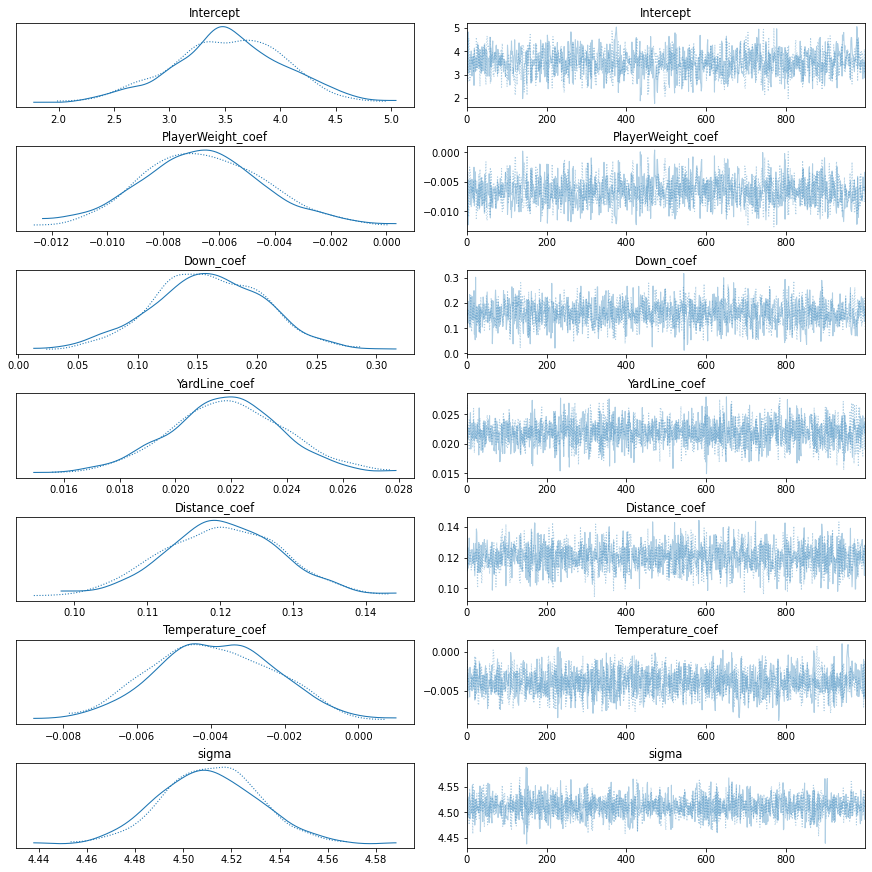

In [44]:
pm.traceplot(linear_trace, figsize = (12, 12));

Case study: Austin Ekeler. RB for LA Chargers. Weight ~200 pounds, plays in an air conditioned stadium (SOFI Stadium in LA).

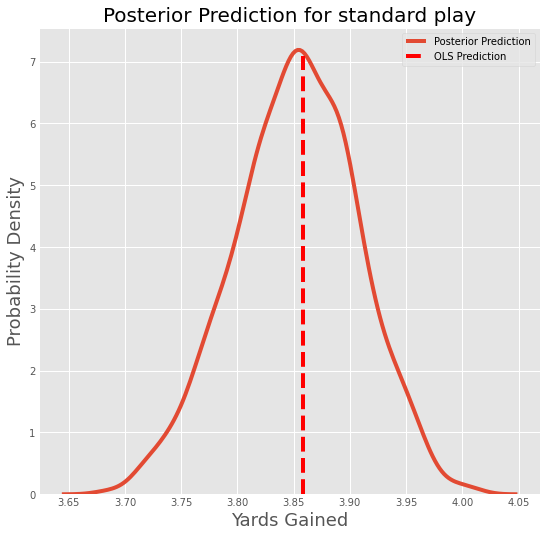

In [95]:
bayes_prediction =  (linear_trace['Intercept'] + linear_trace['PlayerWeight_coef'] * 200 + 
                    linear_trace['Down_coef'] * 1 + linear_trace['YardLine_coef'] * 25 + 
                    linear_trace['Distance_coef'] * 10 + linear_trace['Temperature_coef'] * 70)

plt.figure(figsize = (8, 8))
plt.style.use('ggplot')
sns.kdeplot(bayes_prediction, label = 'Posterior Prediction')
plt.vlines(x = 3.362082 * 1 + -0.005574 * 200 + 0.141095 * 1 + 0.019872 * 25 + 0.122961 * 10 + -0.003660 * 70, 
           ymin = 0, ymax = 7.1, 
           label = 'OLS Prediction',
          colors = 'red', linestyles='--')
plt.legend();
plt.xlabel('Yards Gained', size = 18), plt.ylabel('Probability Density', size = 18);
plt.title('Posterior Prediction for standard play', size = 20);

In [96]:
len(bayes_prediction[bayes_prediction > 4.0]) / len(bayes_prediction)

0.003

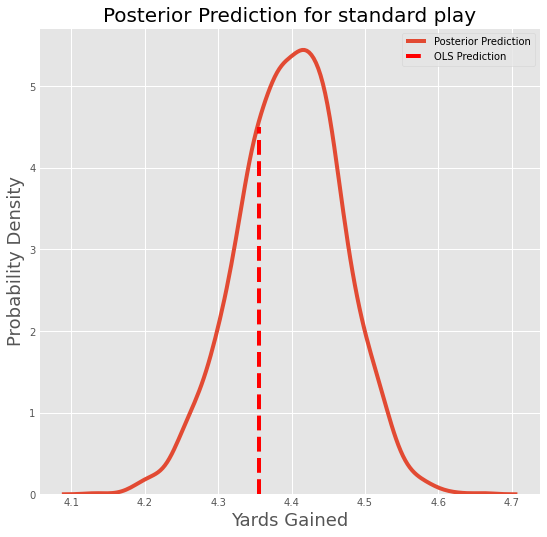

In [97]:
bayes_prediction =  (linear_trace['Intercept'] + linear_trace['PlayerWeight_coef'] * 200 + 
                    linear_trace['Down_coef'] * 1 + linear_trace['YardLine_coef'] * 50 + 
                    linear_trace['Distance_coef'] * 10 + linear_trace['Temperature_coef'] * 70)

plt.figure(figsize = (8, 8))
plt.style.use('ggplot')
sns.kdeplot(bayes_prediction, label = 'Posterior Prediction')
plt.vlines(x = 3.362082 * 1 + -0.005574 * 200 + 0.141095 * 1 + 0.019872 * 50 + 0.122961 * 10 + -0.003660 * 70, 
           ymin = 0, ymax = 4.5, 
           label = 'OLS Prediction',
          colors = 'red', linestyles='--')
plt.legend();
plt.xlabel('Yards Gained', size = 18), plt.ylabel('Probability Density', size = 18);
plt.title('Posterior Prediction for standard play', size = 20);

In [98]:
# Ekeler is averaging 4.2 yards / attempt as of Week 15 2022
len(bayes_prediction[bayes_prediction > 4.2]) / len(bayes_prediction)

0.9965

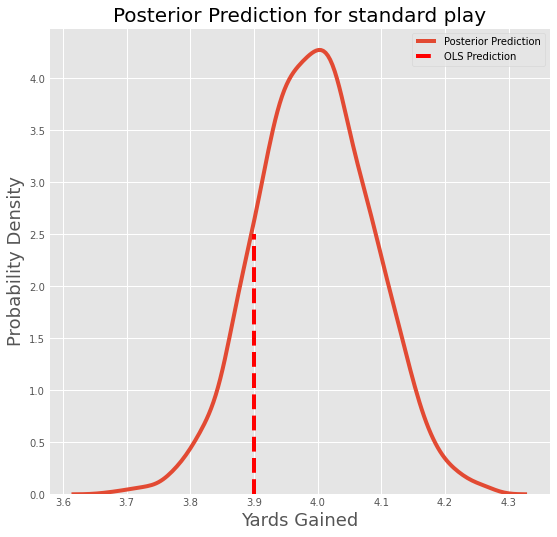

In [99]:
bayes_prediction =  (linear_trace['Intercept'] + linear_trace['PlayerWeight_coef'] * 200 + 
                    linear_trace['Down_coef'] * 3 + linear_trace['YardLine_coef'] * 50 + 
                    linear_trace['Distance_coef'] * 4 + linear_trace['Temperature_coef'] * 70)

plt.figure(figsize = (8, 8))
plt.style.use('ggplot')
sns.kdeplot(bayes_prediction, label = 'Posterior Prediction')
plt.vlines(x = 3.362082 * 1 + -0.005574 * 200 + 0.141095 * 3 + 0.019872 * 50 + 0.122961 * 4 + -0.003660 * 70, 
           ymin = 0, ymax = 2.5, 
           label = 'OLS Prediction',
          colors = 'red', linestyles='--')
plt.legend();
plt.xlabel('Yards Gained', size = 18), plt.ylabel('Probability Density', size = 18);
plt.title('Posterior Prediction for standard play', size = 20);

In [100]:
len(bayes_prediction[bayes_prediction > 4.0]) / len(bayes_prediction)

0.4755

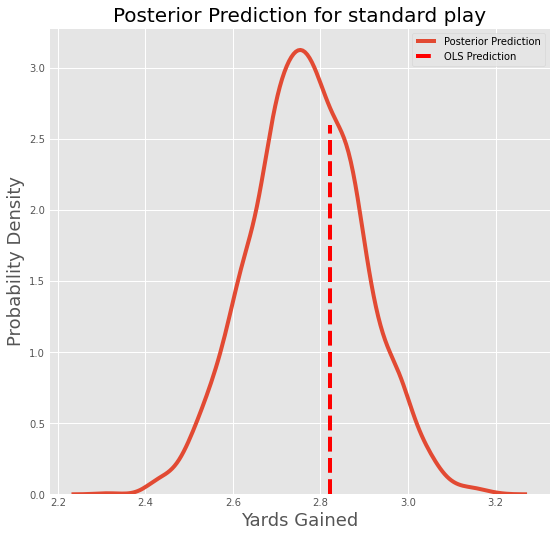

In [101]:
bayes_prediction =  (linear_trace['Intercept'] + linear_trace['PlayerWeight_coef'] * 200 + 
                    linear_trace['Down_coef'] * 4 + linear_trace['YardLine_coef'] * 3 + 
                    linear_trace['Distance_coef'] * 1 + linear_trace['Temperature_coef'] * 70)

plt.figure(figsize = (8, 8))
plt.style.use('ggplot')
sns.kdeplot(bayes_prediction, label = 'Posterior Prediction')
plt.vlines(x = 3.362082 * 1 + -0.005574 * 200 + 0.141095 * 4 + 0.019872 * 1 + 0.122961 * 2 + -0.003660 * 70, 
           ymin = 0, ymax = 2.6, 
           label = 'OLS Prediction',
          colors = 'red', linestyles='--')
plt.legend();
plt.xlabel('Yards Gained', size = 18), plt.ylabel('Probability Density', size = 18);
plt.title('Posterior Prediction for standard play', size = 20);

In [102]:
# Probability of Scoring
len(bayes_prediction[bayes_prediction > 3.0]) / len(bayes_prediction)

0.0315

/Users/matthewkilgariff/opt/anaconda3/envs/final_project/lib/python3.9/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


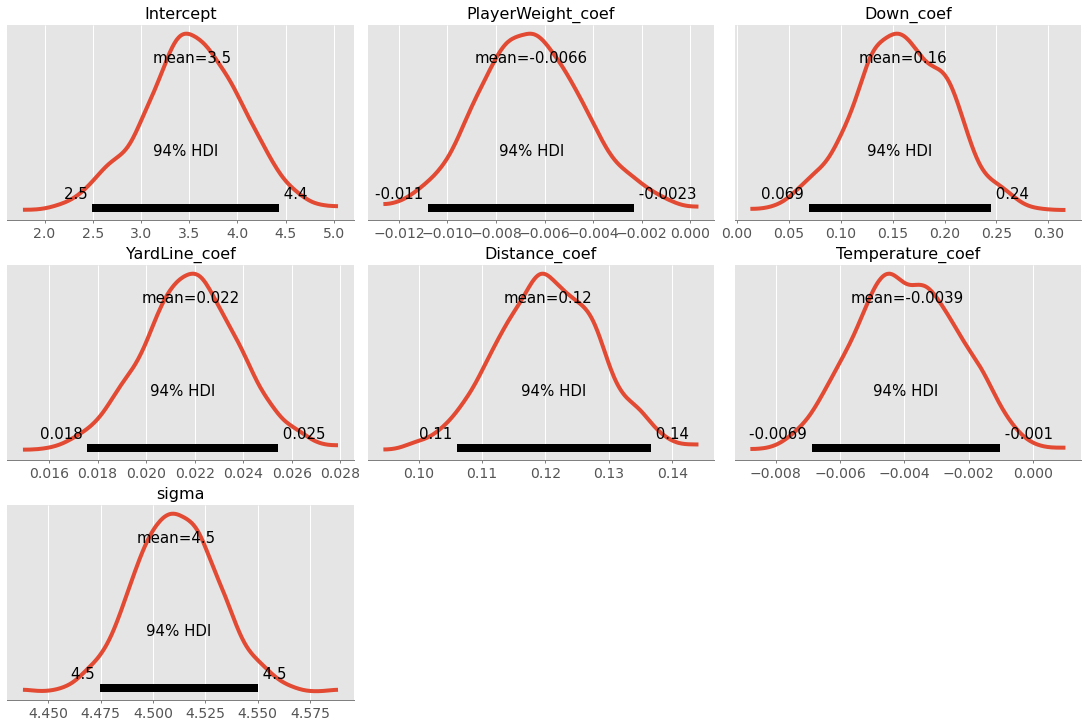

In [91]:
pm.plot_posterior(linear_trace, figsize = (15, 10));

In [71]:
len(bayes_prediction[bayes_prediction > 4.2]) / len(bayes_prediction)

0.9965

/var/folders/vq/432cnvbx5wn1vdmt5b1chfg80000gn/T/ipykernel_21621/450653673.py:1: DeprecationWarning: The function `forestplot` from PyMC3 is just an alias for `plot_forest` from ArviZ. Please switch to `pymc3.plot_forest` or `arviz.plot_forest`.
  pm.forestplot(linear_trace);
/Users/matthewkilgariff/opt/anaconda3/envs/final_project/lib/python3.9/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


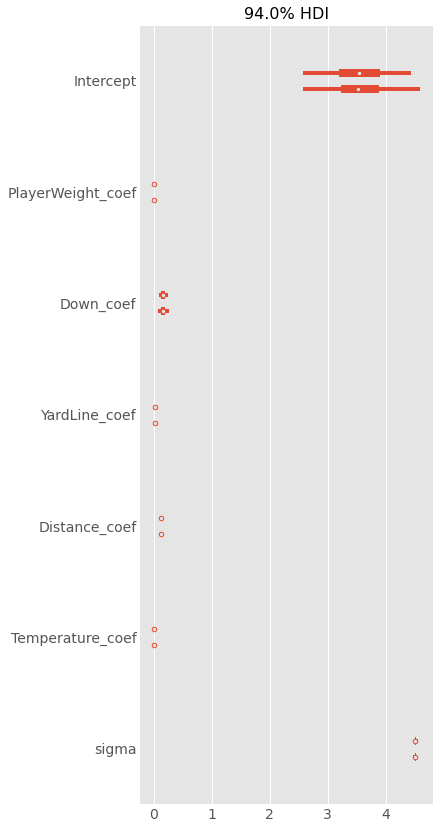

In [58]:
pm.forestplot(linear_trace);